In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()
init.endpoint

replicating local resources


'https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc'

In [ ]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L03.01", varname="student");

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from local.lib import mlutils
from IPython.display import Image
%matplotlib inline

In [ ]:
d = pd.read_csv("local/data/trilotropicos_small.csv")
X,y = d.values[:,:2], d.values[:,-1]
print (d.shape, X.shape, y.shape)
print (X[:5])
print (y[:5])
d.head()

(20, 3) (20, 2) (20,)
[[0.5  0.65]
 [0.75 0.34]
 [0.37 0.5 ]
 [0.57 0.74]
 [1.   0.69]]
[0. 1. 1. 0. 1.]


,width,height,y
0,0.50,0.65,0.0
1,0.75,0.34,1.0
2,0.37,0.50,1.0
3,0.57,0.74,0.0
4,1.00,0.69,1.0


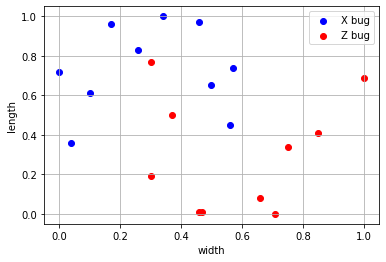

In [ ]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="blue", label="X bug")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="red", label="Z bug")
plt.xlabel("width");plt.ylabel("length"); plt.legend(); plt.grid();

In [ ]:
def predict(X, t):
  Y = []
  for i in range(X.shape[0]): # ANCHO AND LARGO
    if X[i][0]<t[0] and X[i][1]>t[1]:  # condición del modelo
      Y.append(0)
    else:
      Y.append(1)
  return np.array(Y)

In [ ]:

#t = np.r_[.5,.3]
#y_hat = predict(X, t)
#y_hat
#np.mean(y==y_hat)

In [ ]:
def fit(X,y):
  y.astype(int)
  X.astype(int)
  def predict(X, t):
    t.astype(int)
    Y = []
    for i in range(X.shape[0]): # ANCHO AND LARGO
      if X[i][0]<t[0] and X[i][1]>t[1]:  # condición del modelo
        Y.append(0)
      else:
        Y.append(1)
    return np.array([Y])
  l1 = np.arange(0,1.1,0.1)
  l2 = np.arange(0,1.1,0.1)
  T = []
  for i in itertools.product(l1,l2):
    T.append(i)
  t = np.r_[T]
  theta = []
  YT = [] # valores de mayor precisión 
  for j in range(0,len(t)):
    YT.append(np.mean(predict(X,t[j]) == y))
  ind = np.argmax(YT)
  return t[ind]

In [ ]:

t = fit(X,y)
t

array([0.6, 0.2])

0.9

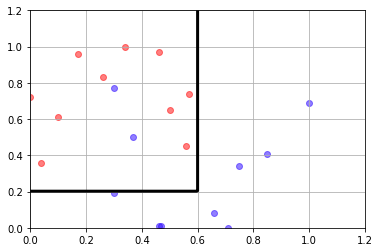

In [ ]:
mlutils.plot_2Ddata_with_boundary(lambda X: predict(X,t), X, y); plt.grid();
np.mean(y==predict(X,t))

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

bX, by = make_blobs(100,n_features=2, centers=2)
bX = MinMaxScaler(feature_range=(0.1,.9)).fit_transform(bX)

In [ ]:
bt = fit(bX, by)

0.99

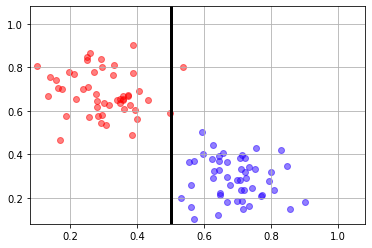

In [ ]:
mlutils.plot_2Ddata_with_boundary(lambda X: predict(X,bt), bX, by); plt.grid();
np.mean(by==predict(bX,bt))

In [19]:
def SimpleModel():
    class _SimpleModel:

        def __init__(self):
          self.t = []
          pass

        def fit(self, X, y):
          y.astype(int)
          X.astype(int)
          def predict1(X, T):
            T.astype(int)
            Y = []
            for i in range(X.shape[0]): # ANCHO AND LARGO
              if X[i][0]<T[0] and X[i][1]>T[1]:  # condición del modelo
                Y.append(0)
              else:
                Y.append(1)
            return np.array([Y])
          l1 = np.arange(0,1.1,0.1)
          l2 = np.arange(0,1.1,0.1)
          T = []
          for i in itertools.product(l1,l2):
            T.append(i)
          g = np.r_[T]
          YT = [] # valores de mayor precisión 
          for j in range(0,len(g)):
            YT.append(np.mean(predict1(X,g[j]) == y))
          ind = np.argmax(YT)
          self.t = g[ind]
          return self.t

        def predict(self, X):
          Y = []
          for i in range(X.shape[0]): # ANCHO AND LARGO
            if X[i][0]<self.t[0] and X[i][1]>self.t[1]:  # condición del modelo
              Y.append(0)
            else:
              Y.append(1)
          return np.array(Y)
        
    return _SimpleModel()

In [20]:
m = SimpleModel()
m.fit(X,y)
np.mean(m.predict(X) ==y)  #Precisión del modelo 

0.9

0.9

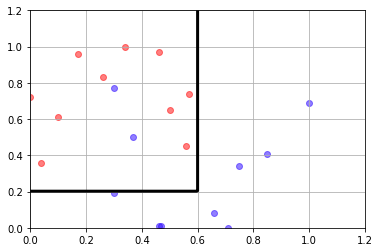

In [21]:
mlutils.plot_2Ddata_with_boundary(m.predict, X, y); plt.grid();
np.mean(y==m.predict(X))

0.87

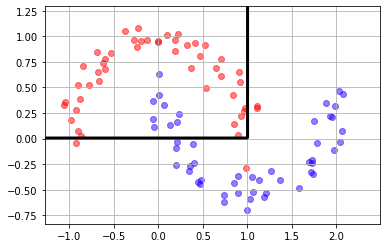

In [22]:
from sklearn.datasets import make_moons

mX, my = make_moons(100, noise=.1)
m = SimpleModel()
m.fit(mX,my)

mlutils.plot_2Ddata_with_boundary(m.predict, mX, my); plt.grid();
np.mean(my==m.predict(mX))